In [186]:
import pandas as pd
import numpy as np
from random import shuffle
import random
import seaborn as sns

In [2]:
dice = pd.Series([1,2,3,4,5,6])

In [3]:
dice.sample(1).values[0]

5

In [4]:
rolls = [dice.sample(1).values[0] for _ in range(10000)]

In [5]:
rolls[0:10]

[2, 5, 5, 1, 6, 6, 6, 6, 5, 4]

In [6]:
pd.Series(rolls).value_counts(normalize = True)

4    0.1700
2    0.1688
1    0.1679
6    0.1671
3    0.1643
5    0.1619
dtype: float64

In [7]:
1/6

0.16666666666666666

In [8]:
dice.value_counts(normalize = True)

1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
dtype: float64

Find probability that in group of 23 people there would be two with the same birthday

In [9]:
birthdays = [np.random.randint(1,366) for _ in range(23)]

In [10]:
print(len(birthdays)-len(set(birthdays)))

1


In [11]:
def find_duplicates(lst):
    return [item for item in set(lst) if lst.count(item) > 1]

find_duplicates(birthdays)

[312]

In [13]:
def detect_duplicates(size=23,experiments=100):
    true_count = 0
    for i in range (0,experiments):
        birthdays = [np.random.randint(1,366) for _ in range(size)]
        if len(birthdays)-len(set(birthdays)) !=0:
            true_count += 1
        else:
            pass
    return true_count/experiments


detect_duplicates()

0.53

Exam: Stundet is ready for 20 tickets from 30. What is his best tactc to go, first or second, so probability of getting prepared ticket higher?

In [14]:
tickets = list(range(1,33))
tickets

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [15]:
student = list(range(1,21))
student 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [16]:
shuffle(tickets)
tickets

[4,
 32,
 10,
 15,
 25,
 13,
 22,
 31,
 19,
 1,
 27,
 29,
 7,
 30,
 11,
 20,
 28,
 14,
 6,
 12,
 3,
 24,
 8,
 9,
 18,
 16,
 5,
 23,
 17,
 21,
 2,
 26]

In [17]:
26 in student

False

In [19]:
def lucky_student():
    '''
    In this function we check
    '''

    n = 1000000
    student = list(range(1,21))
    tickets = list(range(1,31))
    result_1 = []


    for _ in range(n):
        shuffle(tickets)
        result_1.append(tickets[0] in student )

    return (np.mean(result_1))

In [52]:
def lucky_2nd_student():
    '''
    In this function we check
    '''

    n = 1000000
    student = list(range(1,21))
    # tickets = list(range(1,31))

    result = []
    

    for _ in range(n):
        tickets = list(range(1,31))
        shuffle(tickets)
        index_to_remove = random.randint(0, len(tickets) - 1)
        tickets.pop(index_to_remove)
        result.append(tickets[0] in student )

    return (np.mean(result))

In [53]:
print(lucky_student())
print('Analytical solution: ', 20/30)
print(lucky_2nd_student())

0.66569
Analytical solution:  0.6666666666666666
0.667105


In [57]:
print("Stundetnt goes first:")
print(lucky_student())
print('Analytical solution: ', 20/30)
print("Student goes second:")
print(lucky_2nd_student())
print('Analytical solution: ', (2/3)*(19/29)+(1/3)*(20/29))

Stundetnt goes first:
0.666768
Analytical solution:  0.6666666666666666
Student goes second:
0.666251
Analytical solution:  0.6666666666666666


Ночью произошло ДТП с участием такси. В городе работают две компании такси — «Синие» и «Зелёные». «Зелёным» принадлежит 85% такси, «Синим» 15%. Свидетель аварии утверждает, что такси принадлежало «Синим». Следственный эксперимент показал, что ночью свидетель верно определяет цвет такси в 80%. Какова вероятность того, что такси действительно принадлежало «Синим»?

In [ ]:
d={'real_car':np.random.binomial(1,0.15,10000),'guess':np.random.binomial(1,0.8,10000)}

df1 = pd.DataFrame(data=d)
df1.groupby('real_car')['guess'].mean()
#real car 1 - green, 0 -blue. guess -0 - false, 1 -true

real_car
0    0.801534
1    0.807869
Name: guess, dtype: float64

Real Answer (the same asp precision TP/TP+FP)

In [215]:
df.loc[lambda x:((x['taxi']==1) & (x['witness_answer']==1))].shape[0]/df.loc[lambda x:((x['taxi']==1) & (x['witness_answer']==1)|(x['taxi']==0) & (x['witness_answer']==1))].shape[0]

0.41048637461193516

In [ ]:
#analytic solution

12/(0.2*85+ 0.8 * 15) 

In [207]:
df.groupby('witness_answer')['taxi'].mean()

witness_answer
0    0.040558
1    0.410486
Name: taxi, dtype: float64

<AxesSubplot: ylabel='Count'>

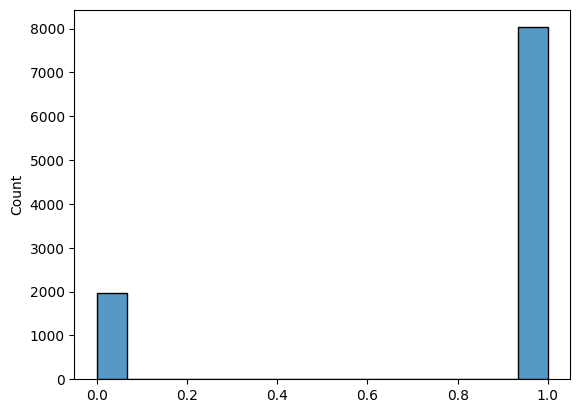

In [155]:
sns.histplot(np.random.binomial(1,0.8,10000))

<AxesSubplot: ylabel='Density'>

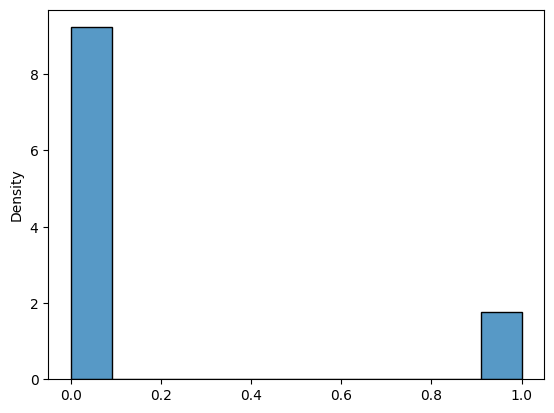

In [159]:
sns.histplot(np.random.binomial(1,0.15,1000),stat='density')

Русская рулетка. Есть револьвер с 2 вставленными подряд патронами. Первый крутит барабан и стреляет и остается жив. Твоя очередь: тебе предлагает покрутить барабан перед выстрелом. Согласишься или сразу выстрелишь и почему?

In [223]:
chamber =[1,1,0,0,0,0]


In [229]:
def one_turn(chamber):
    new_chamber=[0,0,0,0,0,0]
    n = len(chamber)
    for i in range(n):
        if i < n-1:
            new_chamber[i+1] = chamber[i]
        else:
            new_chamber[0]=chamber[i]
    return new_chamber

In [249]:
def spin_chamber(chamber):
    n = np.random.randint(1,7)
    for i in range(n):
        chamber = one_turn(chamber)
    return chamber

In [280]:
spin_chamber(chamber)

[1, 0, 0, 0, 0, 1]

In [237]:
one_turn(chamber)

[0, 1, 1, 0, 0, 0]

In [292]:
pd.Series([spin_chamber([1,1,0,0,0]) for _ in range(100)]).value_counts(normalize=True)

[0, 1, 1, 0, 0, 0]    0.23
[0, 0, 0, 0, 1, 1]    0.21
[0, 0, 1, 1, 0, 0]    0.16
[0, 0, 0, 1, 1, 0]    0.15
[1, 1, 0, 0, 0, 0]    0.14
[1, 0, 0, 0, 0, 1]    0.11
dtype: float64

In [247]:
one_turn([0, 0, 0, 0, 1, 1])

[1, 0, 0, 0, 0, 1]

In [306]:
#loading revolver
chamber = [1,1,0,0,0,0]
# first player
chamber=spin_chamber(chamber)
# first player shoots
chamber=one_turn(chamber)
p1 = chamber[0]

chamber[0] =0
# if first player is alive 
chamber=spin_chamber(chamber)

#then second player turns  chamber  - 

chamber=one_turn(chamber)
p2 = chamber[0]



0


In [321]:
n = 10000
result = []
for _ in range(n):
    #loading revolver
    chamber = [1,1,0,0,0,0]
    # first player
    chamber=spin_chamber(chamber)
    # first player shoots
    chamber=one_turn(chamber)
    p1 = chamber[0]

    chamber[0] =0
    # if first player is alive 
    chamber=spin_chamber(chamber)

    #then second player turns  chamber  - 

    chamber=one_turn(chamber)
    p2 = chamber[0]

    result.append((p1,p2))



In [322]:
t= pd.DataFrame(result,columns = ['p1','p2'])

t.groupby('p1')['p2'].agg(['count','mean'])

,count,mean
p1,,
0,6635,0.325396
1,3365,0.168499


In [327]:
n = 10000
result = []
for _ in range(n):
    #loading revolver
    chamber = [1,1,0,0,0,0]
    # first player
    chamber=spin_chamber(chamber)
    # first player shoots
    chamber=one_turn(chamber)
    p1 = chamber[0]

    chamber[0] =0
    # if first player is alive 
    # chamber=spin_chamber(chamber)

    #second player  does not turn  chamber  - 
    chamber = one_turn(chamber)
    
    p2 = chamber[0]

    result.append((p1,p2))



In [328]:
t= pd.DataFrame(result,columns = ['p1','p2'])

t.groupby('p1')['p2'].agg(['count','mean'])

,count,mean
p1,,
0,6637,0.251921
1,3363,0.508177


Hence its more handy to not turn the chamber

In [337]:
#analytical solution

2/6

0.3333333333333333

In [338]:
3/5

0.6

In [330]:
x = np.arange(10)
np.roll(x, 2)

array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])

In [332]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [335]:
np.roll(x, 2)

array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])